## Load the packages & data

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statistics

In [3]:
df_user = joblib.load('user_no_friend.py') 

In [4]:
df_user.head()

,u_id,name,review_count,yelp_since,useful,funny,cool,elite,fan,avg_star,...,c_more,c_profile,c_cute,c_list,c_note,c_plain,c_cool,c_funny,c_writer,c_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,267,3.91,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,3.74,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013",52,3.32,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011",28,4.27,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,1,3.54,...,1,0,0,0,1,1,0,0,0,0


In [5]:
df_user.columns

Index(['u_id', 'name', 'review_count', 'yelp_since', 'useful', 'funny', 'cool',
       'elite', 'fan', 'avg_star', 'c_hot', 'c_more', 'c_profile', 'c_cute',
       'c_list', 'c_note', 'c_plain', 'c_cool', 'c_funny', 'c_writer',
       'c_photos'],
      dtype='object')

## Basic descriptives
1. distriburtion of review count
2. convert yelp_since as datetime, get distribution of yelping days
3. distributio of useful/funny/cool (subplots)
4. elite => create binary elite yes/no & elite_counts
5. distribution of fans
6. distribution of average star
7. distribution of c_total (check what are compliments)

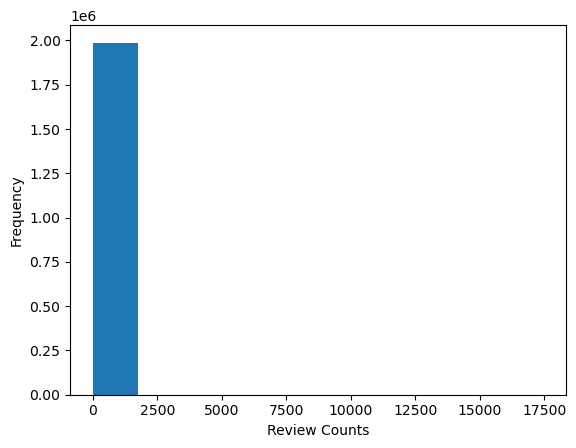

In [45]:
# basic 1: distribution of review counts
plt.figure()
plt.hist(df_user['review_count'])
plt.xlabel('Review Counts')
plt.ylabel('Frequency')
plt.show()

In [59]:
df_user['review_count'].max() # 17473

(df_user['review_count'] > 500).sum()/len(df_user)*100 # 0.43
(df_user['review_count'] > 100).sum()/len(df_user)*100 # 4.56
(df_user['review_count'] > 50).sum()/len(df_user)*100 # 9.35
(df_user['review_count'] > 10).sum()/len(df_user)*100 # 34%
(df_user['review_count'] > 5).sum()/len(df_user)*100 # 49%
(df_user['review_count'] == 5).sum()/len(df_user)*100 # 5%

5.143173916958474

In [61]:
df_user['label'] = pd.cut(x=df_user['review_count'], bins=[0, 5, 10, 50, 100, 500, 20000],
                     labels=[ '0-5', '6-10', '11-50', '51-100', '101-500', '501-20000'])
df_user['label'].value_counts()/len(df_user)*100

# 5% users never wrote any reviews.

0-5          50.454827
11-50        24.954814
6-10         15.237057
51-100        4.781988
101-500       4.137488
501-20000     0.431109
Name: label, dtype: float64

In [65]:
# basic 2: yelp_since
df_user['yelp_since'] = df_user['yelp_since'].astype("datetime64")


/var/folders/nj/f9znvfvs4znf7d4g_hm9z7nm0000gn/T/ipykernel_77103/3510078568.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df_user['yelp_since'] = df_user['yelp_since'].astype("datetime64")


In [95]:
df_user['yelp_since'].max() # assume data was gethered on 02/01/22 

Timestamp('2022-01-19 17:15:47')

In [96]:
import datetime
current_dt = datetime.datetime.strptime('020122', '%m%d%y')
df_user['yelp_time'] = (current_dt - df_user['yelp_since']).dt.total_seconds()/(3600*24*365)

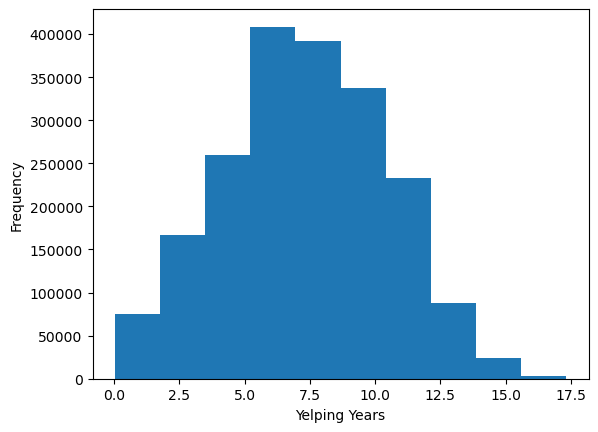

count    1.987897e+06
mean     7.325209e+00
std      3.098577e+00
min      3.364577e-02
25%      5.186163e+00
50%      7.310598e+00
75%      9.595295e+00
max      1.731681e+01
Name: yelp_time, dtype: float64

In [97]:
# get distribution
plt.figure()
plt.hist(df_user['yelp_time'])
plt.xlabel('Yelping Years')
plt.ylabel('Frequency')
plt.show()
# pretty normal
df_user['yelp_time'].describe() # mean = 7.32 years

In [102]:
(df_user['yelp_time'] <= 1).sum()/len(df_user) # 2%
(df_user['yelp_time'] <= 0.5).sum()/len(df_user) # 0.8%

0.008463718190630602

In [116]:
df_newest = df_user[df_user['yelp_time'] <= 0.5 ]
df_newest[df_newest['elite_yn'] == False]['review_count'].value_counts()
df_newest[df_newest['elite_yn'] == False].sort_values(by = ['review_count'], ascending = False)

,u_id,name,review_count,yelp_since,useful,funny,cool,elite,fan,avg_star,...,c_note,c_plain,c_cool,c_funny,c_writer,c_photos,elite_ct,elite_yn,label,yelp_time
763508,kj1r6Az2lNOKWLCB85GB9Q,Carlos,128,2021-10-14 21:21:04,2,1,1,,0,5.00,...,0,0,0,0,0,0,0,False,101-500,0.298933
519113,Gwb2dnY5fSnT0mSrbBziqQ,Jade,100,2021-12-06 03:18:52,6,3,2,,0,2.39,...,0,4,0,0,0,0,0,False,51-100,0.155786
1093999,78q_t4uqXSGethXMl3l_IA,Maria,96,2021-08-06 04:09:31,30,2,13,,0,4.18,...,0,0,0,0,0,0,0,False,51-100,0.489936
349048,bIw6zquJOoUyUaidD85q4Q,Jenna,89,2021-10-19 10:42:15,8,0,2,,0,4.82,...,0,0,0,0,0,0,0,False,51-100,0.286449
332435,bpIpYGrTrKr3ExTc8OE-jQ,Robert,87,2021-11-19 15:54:52,8,2,1,,0,3.58,...,0,0,0,0,0,0,0,False,51-100,0.200923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510909,h2xeEEOpFyZHBnezJy1pYQ,Gemmika,0,2021-12-07 23:30:55,1,1,0,,0,5.00,...,0,0,0,0,0,0,0,False,NaN,0.150740
1960146,oMs1WGbr4pc-k5gtBMN94w,Herminio,0,2021-09-18 18:33:05,0,0,0,,0,5.00,...,0,0,0,0,0,0,0,False,NaN,0.370485
1968664,B0V9NhyiDBxuaJkTtMLz-Q,Felicia,0,2021-11-07 17:28:27,0,0,0,,0,5.00,...,0,0,0,0,0,0,0,False,NaN,0.233622
1954765,ieAE0UIacoLUHtSigQrHyw,Zoey,0,2022-01-19 01:42:54,0,0,0,,0,5.00,...,0,0,0,0,0,0,0,False,NaN,0.035421


In [150]:
df_newest[(df_newest['elite_yn'] == False )&(df_newest['avg_star'] == 5)].sort_values(by = ['review_count'], ascending = False).head(50)

,u_id,name,review_count,yelp_since,useful,funny,cool,elite,fan,avg_star,...,c_note,c_plain,c_cool,c_funny,c_writer,c_photos,elite_ct,elite_yn,label,yelp_time
763508,kj1r6Az2lNOKWLCB85GB9Q,Carlos,128,2021-10-14 21:21:04,2,1,1,,0,5.0,...,0,0,0,0,0,0,0,False,101-500,0.298933
1291248,-HijhChAsyFVXahhDDIJlA,Josue,19,2021-09-02 07:15:43,0,0,0,,0,5.0,...,0,0,0,0,0,0,0,False,11-50,0.415609
899014,etjhela_DXw6RBgT1Y8L7w,Andrew,18,2021-09-20 13:27:40,2,1,1,,1,5.0,...,0,0,1,1,0,0,0,False,11-50,0.365587
326138,98RNA2lY-aEAzs22BPvCsA,Olivia,18,2021-10-26 18:30:22,7,0,3,,0,5.0,...,1,0,0,0,2,1,0,False,11-50,0.266381
1706810,QzzAqXQfjivofk9068X_QA,Aaron,17,2021-12-13 15:46:37,0,0,0,,0,5.0,...,0,0,0,0,0,0,0,False,11-50,0.135185
942054,ytdLK_JaX5CyE7cmEFCZ8Q,Miri,16,2021-08-04 12:13:28,0,0,0,,0,5.0,...,0,0,0,0,0,0,0,False,11-50,0.494495
780675,ON99eqFQXGu2wiHxxKvcTw,JaNelle,13,2021-08-29 12:46:03,1,0,0,,0,5.0,...,0,0,0,0,0,0,0,False,11-50,0.425940
504264,WegUKr1QkBtJDHh-MuzD9w,Taylor,12,2021-09-19 14:21:59,3,0,1,,0,5.0,...,0,0,2,2,1,0,0,False,11-50,0.368223
915695,U0CecCbY30NLUm-7ufsKPw,Aaron,11,2021-10-15 03:14:59,0,0,0,,0,5.0,...,0,0,0,0,0,0,0,False,11-50,0.298259
1292463,wbvmZ6Rc3WcCB41VcatHdA,Aly,11,2021-08-24 01:25:18,4,1,3,,0,5.0,...,0,0,0,0,0,0,0,False,11-50,0.440934


In [36]:
# basic 4: elite count & elite yes/no
elite_ct = []
for i in range(len(df_user['elite'])):
    #print(i)
    new_add = df_user['elite'][i]
    if new_add == '':
        elite_ct.append(0)
    else:
        elite_ct.append(len(new_add.split(',')))

In [38]:
df_user['elite_ct'] = elite_ct
df_user['elite_yn']= df_user['elite_ct'] > 0

In [41]:
# percentage elite
df_user['elite_yn'].value_counts()/len(df_user)*100  
# 4.6% elite

False    95.412338
True      4.587662
Name: elite_yn, dtype: float64

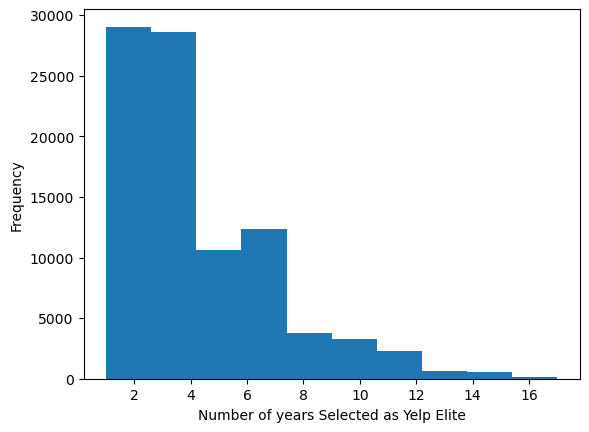

In [44]:
# distribution of elite counts
dat = df_user[df_user['elite_yn']]['elite_ct']
plt.figure()
plt.hist(dat)
plt.xlabel('Number of years Selected as Yelp Elite')
plt.ylabel('Frequency')
plt.show()
# very skewed, most of Yelp Elites were selected less than 4 times.

In [137]:
# basic 5: distribution of number of fans
(df_user['fan'] <= 5).sum()/len(df_user) # 96%
(df_user['fan'] == 0).sum()/len(df_user) # 79%

0.7937383073670315

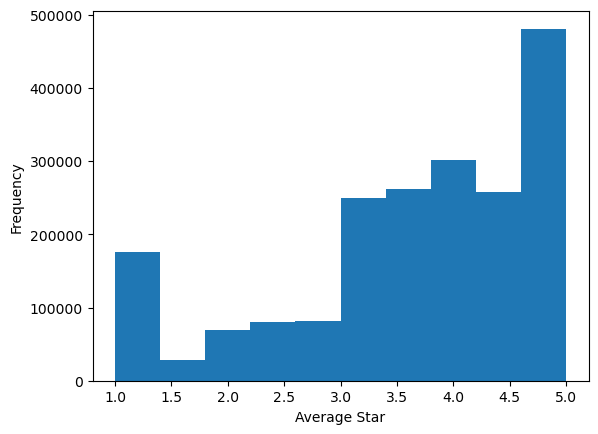

In [138]:
# basic 6: distribution of average stars
plt.figure()
plt.hist(df_user['avg_star'])
plt.xlabel('Average Star')
plt.ylabel('Frequency')
plt.show()
# On average, yelp users tend to give higher star, yet there are some yelpers tend to give 1 star. 

In [140]:
# percentage of users with average star lower than 1.5
(df_user['avg_star'] <= 1.5).sum()/len(df_user) # 9.6%

0.09605879982715403

In [143]:
# what are the review counts of these 'overly-strict' yelp users?
strict_user_rct = df_user[(df_user['avg_star'] <= 1.5)]['review_count']
strict_user_rct.describe()

count    190955.000000
mean          1.873410
std           2.895286
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         169.000000
Name: review_count, dtype: float64

In [ ]:
# useful/funny/cool and c_total are heavily skewed. Look into them later.

## Suspicious sign:
1. Average review per day: if it exceeds certain amount
2. Upon condition 1, the distribution of the ratings are skewed, mostly 5 or 1
3. Upon condition 2, check the reviewed business location, if mostly in the same city/state
4. Upon condition 3, check the review count & average ratings of the business